In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
short = lambda rho: round(rho, 2)
mype = [pe.withStroke(linewidth=4, foreground='w')]

1.66 (0.24)A^2/ps
1.30 (0.23)A^2/ps
1.69 (0.29)A^2/ps
0.17 (0.06)A^2/ps


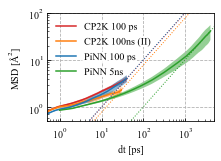

In [30]:
f, ax = plt.subplots(1,1, figsize=[3,2])
exp = '../exp/prod-adam-run2'
ana = f'{exp}/analyses'
rho = 1.0753
#rho = 1.1551
r = short(rho)
xlim = [0.5,5e3]
ylim = [0.5, 100]
which = 1 # 1-> H* 2-> O 3->N*
geos = ['a32b32i0', 'a16b16i16', 'a0b0i32']

t_ingenmey, hmsd_ingenmey = np.loadtxt('msd_h_ingenmey.dat').T

def plot_msd(ax, data, which=1, **kwargs):
    t = data[0][:,0]
    msd_mean = np.mean([dat[:,which] for dat in data], axis=0)
    msd_std =  np.std( [dat[:,which] for dat in data], axis=0)
    l, = ax.plot(t, msd_mean, **kwargs)
    print(f'{msd_mean[-1]/t[-1]/6*1e-4*1e6:.2f} ({msd_std[-1]/t[-1]/6*1e-4*1e6:.2f})A^2/ps')
    ax.plot(xlim, np.array(xlim)/t[-1]*msd_mean[-1], lw=1, ls=':', **kwargs)
    kwargs['facecolor'] = kwargs.pop('color')
    ax.fill_between(t, msd_mean-msd_std, msd_mean+msd_std, 
                   alpha=0.5, **kwargs)
    return l
    

data_cp2k = [np.load(f'{ana}/cp2k/{geo}-rho{rho}/msd-10-110ps/msd.npy') for geo in geos]
data_vali = [np.load(f'{ana}/vali/{geo}-r{r}/msd-10-50ps/msd.npy') for geo in geos]
data_prod = [np.load(f'{ana}/prod/nvt-340k-5ns-0/{geo}-r{r}/msd-5-10ns/msd.npy') for geo in geos]
data_prod2 = [np.load(f'{ana}/prod/nvt-340k-5ns-0/{geo}-r{r}/msd-10-110ps/msd.npy') for geo in geos]
l1 = plot_msd(ax, data_cp2k,  which=which, color='tab:red')
l2 = plot_msd(ax, data_vali,  which=which, color='tab:orange')
l3 = plot_msd(ax, data_prod2, which=which, color='tab:blue')
l4 = plot_msd(ax, data_prod, which=which, color='tab:green')
# ax.plot(t_ingenmey, hmsd_ingenmey, 'k-')
# ax.plot(xlim, np.array(xlim)/t_ingenmey[-1]*hmsd_ingenmey[-1], lw=1, ls='--', color='k')
# print(hmsd_ingenmey[-1]/t_ingenmey[-1]/6*1e-4*1e6)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(*xlim)
ax.set_ylim(*ylim)
ax.set_xlabel('dt [ps]')
ax.set_ylabel('MSD [$\AA^2$]')
leg = ax.legend([l1, l2, l3, l4], ['CP2K 100 ps', 'CP2K 100ns (II)', 'PiNN 100 ps', 'PiNN 5ns'], loc=2)
for t in leg.get_texts():
    t.set_path_effects(mype)
ax.grid()
plt.savefig('figs/fig4-self-diff.png')

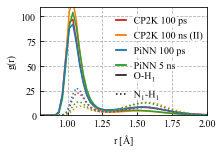

In [28]:
from matplotlib.lines import Line2D
def lines_leg(ax, legends, styles, color='k', **params):
    lines = [Line2D([0], [0], color=color, linestyle=style, lw=1.5) for style in styles]
    legend = ax.legend(lines, legends, **params)
    ax.add_artist(legend)
    return legend
    
def color_leg(ax, legends, styles, **params):
    lines = [Line2D([0], [0], color=style, lw=1.5) for style in styles]
    legend = ax.legend(lines, legends, **params)
    ax.add_artist(legend)
    return legend


f, ax = plt.subplots(1,1, figsize=[3,2])
exp = '../exp/prod-adam-run2'
ana = f'{exp}/analyses'
rho = 1.0753
r = short(rho)

ho_cp2k = [np.loadtxt(f'{ana}/cp2k/{geo}-rho{rho}/rdf-10-110ps/HO_rdf.dat') for geo in geos]
ho_vali = [np.loadtxt(f'{ana}/vali/{geo}-r{r}/rdf-10-50ps/HO_rdf.dat') for geo in geos]
ho_prod = [np.loadtxt(f'{ana}/prod/nvt-340k-5ns-0/{geo}-r{r}/rdf-5-10ns/HO_rdf.dat') for geo in geos]
ho_prod2 = [np.loadtxt(f'{ana}/prod/nvt-340k-5ns-0/{geo}-r{r}/rdf-10-110ns/HO_rdf.dat') for geo in geos]
hn_cp2k = [np.loadtxt(f'{ana}/cp2k/{geo}-rho{rho}/rdf-10-110ps/HN_rdf.dat') for geo in geos]
hn_vali = [np.loadtxt(f'{ana}/vali/{geo}-r{r}/rdf-10-50ps/HN_rdf.dat') for geo in geos]
hn_prod = [np.loadtxt(f'{ana}/prod/nvt-340k-5ns-0/{geo}-r{r}/rdf-5-10ns/HN_rdf.dat') for geo in geos]
hn_prod2 = [np.loadtxt(f'{ana}/prod/nvt-340k-5ns-0/{geo}-r{r}/rdf-10-110ns/HN_rdf.dat') for geo in geos]

def plot_rdf(ax, data, which=1, **kwargs):
    rmid = data[0][:,0]
    rdf_mean = np.mean([dat[:,1] for dat in data], axis=0)
    rdf_std =  np.std( [dat[:,1] for dat in data], axis=0)
    l, = ax.plot(rmid, rdf_mean, **kwargs)
    # ax.fill_between(rmid, rdf_mean-rdf_std, rdf_mean+rdf_std, 
    #                alpha=0.2, **kwargs)
    return l

plot_rdf(ax, ho_cp2k,  which=which, color='tab:red')
plot_rdf(ax, ho_vali,  which=which, color='tab:orange')
plot_rdf(ax, ho_prod, which=which, color='tab:green')
plot_rdf(ax, ho_prod2, which=which, color='tab:blue')

plot_rdf(ax, hn_cp2k,  which=which, ls=':',color='tab:red')
plot_rdf(ax, hn_vali,  which=which, ls=':',color='tab:orange')
plot_rdf(ax, hn_prod, which=which, ls=':',color='tab:green')
plot_rdf(ax, hn_prod2, which=which, ls=':',color='tab:blue')

leg1 = lines_leg(ax, ['O-H$_1$', 'N$_1$-H$_1$'], ['-', ':'],#labelspacing=0.1,
                 handlelength=1, loc=2,bbox_to_anchor=(0.4,0.5))
leg2 = color_leg(ax, ['CP2K 100 ps', 'CP2K 100 ns (II)', 'PiNN 100 ps', 'PiNN 5 ns'], 
                 ['tab:red', 'tab:orange', 'tab:blue', 'tab:green'],
                 handlelength=1, loc=2,bbox_to_anchor=(0.4,1))
for leg in [leg1, leg2]:
    for t in leg.get_texts():
        t.set_path_effects(mype)
ax.set_xlim(0.8,2)
ax.set_ylim(0,110)
ax.grid()
ax.set_xlabel('r [$\AA$]')
ax.set_ylabel('g(r)')
plt.savefig('figs/fig5-rdf.png')